In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('C:/Users/HP/Desktop/100 Days Machine learning/Csv.files/placement-day50(LR).csv')


In [13]:
df.head()


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

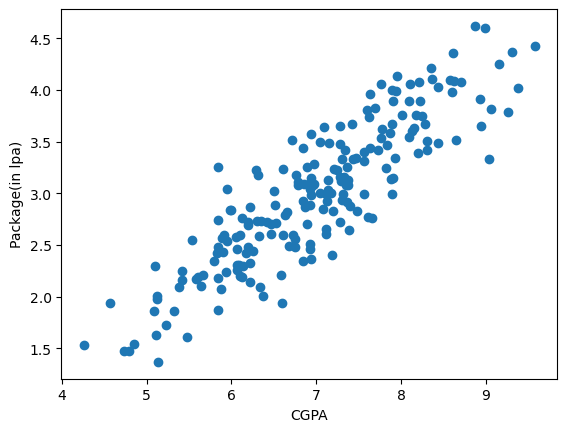

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [109]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [111]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [115]:
from sklearn.linear_model import LinearRegression


In [117]:
lr = LinearRegression()


In [119]:
lr.fit(X_train,y_train)


LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

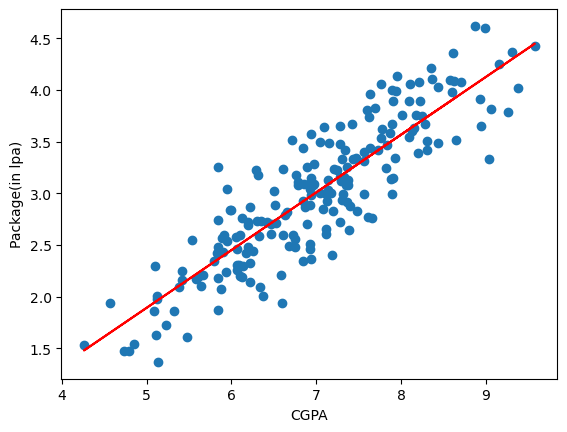

In [121]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [131]:
y_pred = lr.predict(X_test)

In [129]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [133]:
print("MAE", mean_absolute_error(y_test,y_pred)) 

MAE 0.2884710931878175


In [135]:
print("MSE", mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [139]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [147]:
print("R2Square", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2Square 0.780730147510384


In [149]:
# Adjusted R2 score

X_test.shape

(40, 1)

In [153]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [187]:
# irrelevent column
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()


,cgpa,random_feature,package
0,6.89,0.824780,3.26
1,5.12,0.866131,1.98
2,7.82,0.405615,3.25
3,7.42,0.094399,3.67
4,6.94,0.356870,3.57


Text(0, 0.5, 'Package(in lpa)')

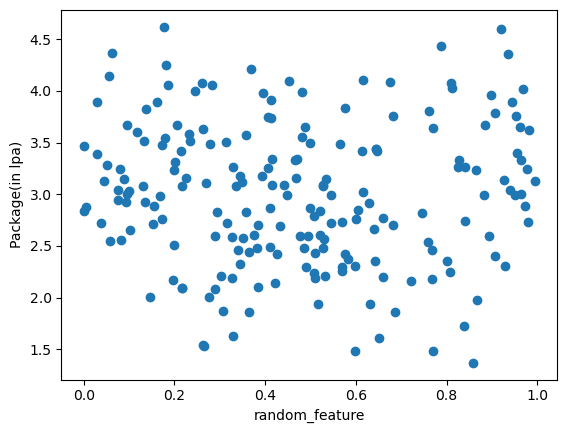

In [189]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [191]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]


In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [195]:
lr = LinearRegression()


In [197]:
lr.fit(X_train,y_train)


LinearRegression()

In [199]:
y_pred = lr.predict(X_test)


In [201]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7809499320076079


In [203]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.7691093877918029

In [213]:
# Valid column
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [215]:
new_df2.sample(5)


,cgpa,iq,package
133,6.05,2.58,2.58
99,6.61,2.64,3.24
90,7.11,2.96,2.66
101,6.71,3.82,3.52
59,7.56,4.41,3.31


Text(0, 0.5, 'Package(in lpa)')

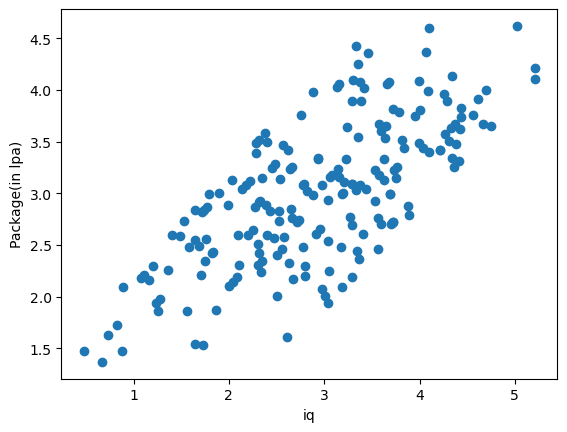

In [217]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [226]:
np.random.randint(-100,100)


98

In [228]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [230]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [232]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [234]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8519122986868838


In [236]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.843907558075364